In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, FixedLocator, MultipleLocator
import re

In [22]:

# Set the path of the directory that contains the CSV files
directory = '/Users/laceymorgan/Desktop/data_job_analysis/'

# Get a list of all CSV files in the directory
csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the concatenated data
df = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for file in csv_files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], ignore_index=True)


In [23]:

df.head()

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_based_on,salary_from,salary_to,salary_source,my_keywords,job_description_summary,preprocessed_description,sentiment_score,salary_mention,named_entity_recognition
0,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
1,Data Analyst,Ookla,"We’re Ookla, the company behind Speedtest, Dow...",via Jobs By Workable,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0,2023-03-08 13:07:51,https://apply.workable.com/ookla/j/96DE997419/...,4.7,20.0,...,Based on local employers,54000.0,120000.0,Indeed,python visualization sql,"We’re Ookla, the company behind Speedtest, Dow...",ookla compani behind speedtest downdetector su...,0.9989,"['range', 'reflected', 'is', 'an', 'estimate',...",(S\n We/PRP\n ’/VBP\n re/JJ\n Ookla/NNP\n ...
2,Senior Data Analyst,Vouch,"About Vouch:\n\nInsurance... sounds slow, old-...",via Y Combinator,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,0,2023-03-08 13:07:51,https://www.ycombinator.com/companies/vouch/jo...,4.6,28.0,...,NaN,NaN,NaN,NaN,python sql tableau,"As an insurance company, data is at the core o...",vouch insur sound slow unexcit exact insur bro...,0.9892,"['Range:', 'The', 'pay', 'range', 'for', 'this...",(S\n About/IN\n (PERSON Vouch/JJ)\n :/:\n ...
3,Program Operations Management Analyst,Google,Minimum qualifications:\n• Bachelor's degree o...,via Girlboss Jobs,eyJqb2JfdGl0bGUiOiJQcm9ncmFtIE9wZXJhdGlvbnMgTW...,0,2023-03-08 13:07:00,https://jobs.girlboss.com/program-operations-m...,4.4,40866.0,...,Based on local employers,49000.0,78000.0,Salary.com,visualization sql tableau,• Knowledge of SQL and data visualization tool...,minimum qualif bachelor degre equival practic ...,0.9908,"['range', 'between', '$109,000', '-', '$117,00...",(S\n (GPE Minimum/JJ)\n qualifications/NNS\n...
4,Business Operations Analyst,Juniper Networks,Job Title: Business Analyst - Global Service O...,via Salary.com,eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBPcGVyYXRpb25zIE...,0,2023-03-08 13:07:00,https://www.salary.com/job/juniper-networks/bu...,4.3,3960.0,...,Juniper Networks,76000.0,120000.0,Indeed,NaN,Responsibilities... The primary responsibility...,job titl busi analyst global servic oper respo...,0.9337,salary not mentioned,(S\n (PERSON Job/NNP)\n Title/NNP\n :/:\n ...


In [24]:
df.count()

job_title                   2280
company_name                2280
job_description             2280
via                         2280
job_id                      2280
posted_hours_ago            2280
report_run_datetime         2280
apply_options               2280
rating                      1007
#_of_reviews                1007
rating_source               1007
salary_based_on              703
salary_from                  703
salary_to                    703
salary_source                703
my_keywords                 1330
job_description_summary     2280
preprocessed_description    2280
sentiment_score             2280
salary_mention              2280
named_entity_recognition    2280
dtype: int64

In [8]:
# Count the number of occurrences of each unique value in the 'job_id' column
job_id_counts = df['job_id'].value_counts()

# Select only the values that occur twice or more
job_id_counts_2 = job_id_counts[job_id_counts >=2]

# Get the count of values that occur exactly twice
num_jobs_with_2_instances = len(job_id_counts_2)

print(f'There were {num_jobs_with_2_instances} job listings that were captured twice or more.')

There were 120 job listings that were captured twice or more.


In [9]:
# Remove duplicate rows based on 'job_id'
df = df.drop_duplicates(subset=['job_id']).copy()

In [10]:
# Analyzing how much NLTK summarizer reduced the descriptions

df['job_desc_len'] = df['job_description'].str.len()
df['job_sum_len'] = df['job_description_summary'].str.len()

avg_job_desc_len = round(df['job_desc_len'].mean())
avg_job_sum_len = round(df['job_sum_len'].mean())
avg_desc_perc_change = round((avg_job_sum_len-avg_job_desc_len)/avg_job_desc_len *-100)

print(f'The average length of a job description was {avg_job_desc_len}, the NLTK summarizer brought the average length down to {avg_job_sum_len}.')
print(f'That is a reduction of {avg_desc_perc_change}% in length on average.')

The average length of a job description was 4160, the NLTK summarizer brought the average length down to 1063.
That is a reduction of 74% in length on average.


In [11]:
# Examining how many listings had hits for my keywords

# Count the number of non-NaN values
keyword_matches = df['my_keywords'].count()

# Count the number of NaN values
keyword_nan = df['my_keywords'].isnull().sum()

# Print the results
print(f'{round(keyword_matches/len(df)*100,2)}% of listings had keyword matches with a count of: {keyword_matches}')
print(f'{round(keyword_nan/len(df)*100,2)}% of listings did not have keyword matches with a count of:  {keyword_nan}')

58.33% of listings had keyword matches with a count of: 70
41.67% of listings did not have keyword matches with a count of:  50


In [11]:
# Looking at the the most common job titles

top_overall_titles = df.groupby(df['job_title']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(df['job_description'])
percent_of_total = top_overall_titles.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_titles_with_pct = pd.concat([top_overall_titles, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_titles_with_pct['percent_of_total'] = top_overall_titles_with_pct['percent_of_total'].round(2)

print(top_overall_titles_with_pct)

                                     count  percent_of_total
job_title                                                   
Data Analyst                           242             12.10
Operations Analyst                     199              9.95
Senior Data Analyst                     58              2.90
Business Operations Analyst             51              2.55
Revenue Operations Analyst              45              2.25
Sr. Data Analyst                        39              1.95
Sales Operations Analyst                38              1.90
Data Analyst (Remote)                   28              1.40
Senior Data Analyst (Remote)            27              1.35
Revenue Operations Analyst (Remote)     26              1.30


In [26]:
# Looking at the companies that have the most listings in the dataset

top_overall_comps = df.groupby(df['company_name']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(df['job_description'])
percent_of_total = top_overall_comps.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_comps_with_pct = pd.concat([top_overall_comps, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_comps_with_pct['percent_of_total'] = top_overall_comps_with_pct['percent_of_total'].round(2)

print(top_overall_comps_with_pct)

                                     count  percent_of_total
company_name                                                
City National Bank                      57              2.50
PCI PHW Packaging Coordinators Inc.     57              2.50
CNA                                     38              1.67
Pie Insurance                           38              1.67
Calm                                    38              1.67
City of Salem                           38              1.67
Samsara                                 38              1.67
Pinterest                               38              1.67
Uplight                                 38              1.67
Beyond Finance                          38              1.67


### Visualizations of Cumulative Data

The following three visualizations give an overview of the data collected over the course of the project. They show which companies are most frequently listing the jobs searched, the actual titles of the listings and where the jobs are being posted most frequently. 

Graphs are saved to an output file.

In [30]:
# Getting the top companies by # of listings 

top_overall_listers = df.groupby(df['company_name']).count()['job_title'].sort_values(ascending=False)[0:25]

top_overall_comps = top_overall_listers.index.tolist()
top_overall_comps_nums = top_overall_listers.values.tolist()

In [31]:
# Remove non-alphanumeric characters from top_comps
top_overall_comps = [comp.replace('\n', ' ') for comp in top_overall_comps]

ValueError: invalid literal for int() with base 10: '+SUBSCRIBE'

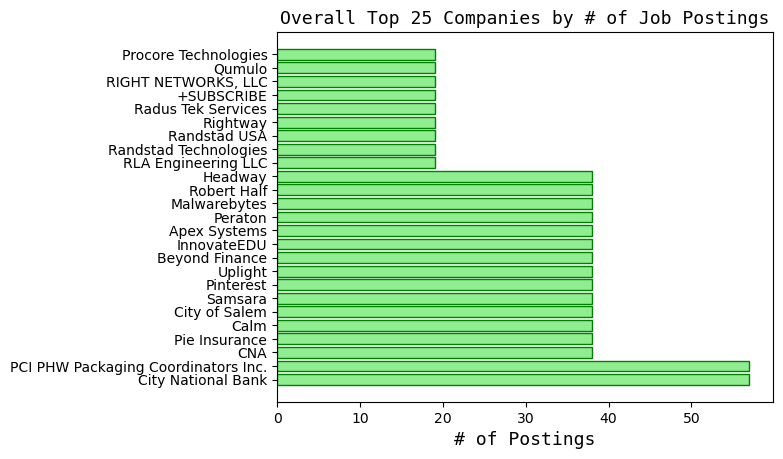

In [33]:

# Create horizontal bar chart for the overall top companies by # of listings 
plt.barh(top_overall_comps, top_overall_comps_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 25 Companies by # of Job Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_comps)), int(max(top_overall_comps_nums))+1))

# Set y-axis label and font
plt.ylabel('Companies', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_companies_2_28_2023.png')
plt.show()


In [34]:
# Getting the overall top job titles by frequency

top_overall_desc = df.groupby(df['job_title']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_title = top_overall_desc.index.tolist()
top_overall_title_nums = top_overall_desc.values.tolist()

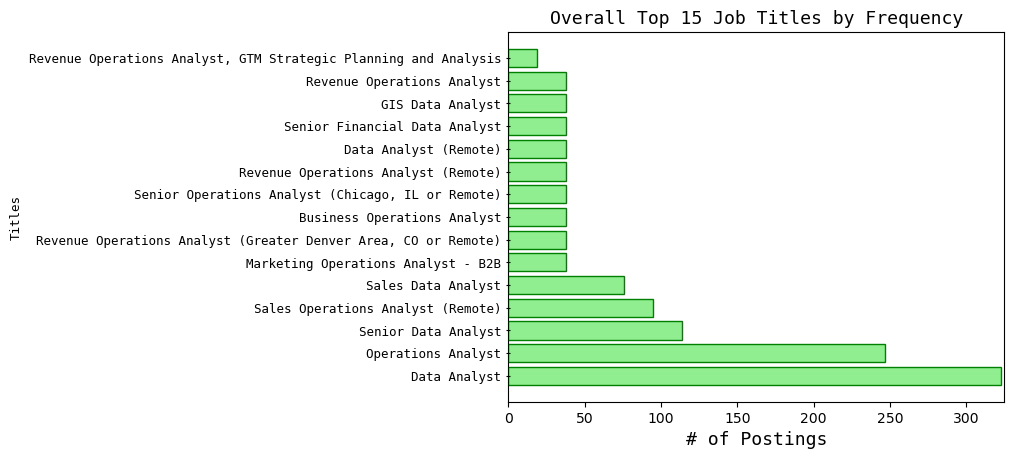

In [39]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_title, top_overall_title_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Job Titles by Frequency', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_title_nums)), int(max(top_overall_title_nums))+1))
x_major_locator = MultipleLocator(50)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xlim(0,325)

# Set y-axis label and font
plt.ylabel('Titles', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
# plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_titles_2_28_2023.png')
plt.show()


In [40]:
# Getting the top overall listings sites by frequency

top_overall_announce = df.groupby(df['via']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_announce_name = top_overall_announce.index.tolist()
top_overall_announce_nums = top_overall_announce.values.tolist()

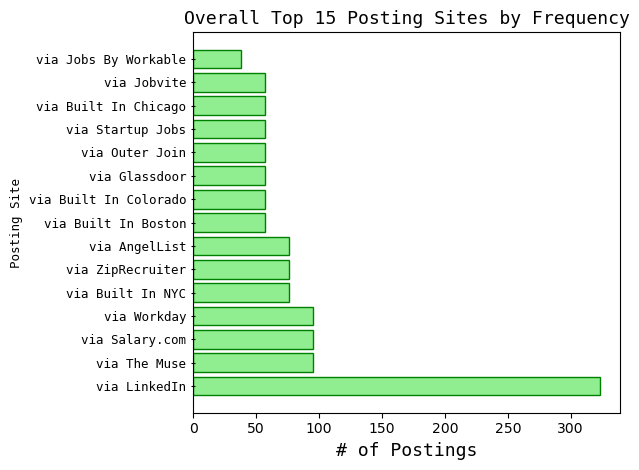

In [42]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_announce_name, top_overall_announce_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Posting Sites by Frequency', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_announce_nums)), int(max(top_overall_announce_nums))+1))
x_major_locator = MultipleLocator(50)
plt.gca().xaxis.set_major_locator(x_major_locator)

# Set y-axis label and font
plt.ylabel('Posting Site', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_posting_site_2_28_2023.png')
plt.show()


## LinkedIn Analysis

Looking at the total # of listings captured by the SERP API Google Job search, by far the most listings are found on LinkedIn so a deeper looking at those specific postings might yeild interesting insights

In [43]:
link_df = df.loc[df['via'] == 'via LinkedIn']

print(f'{len(link_df)} of the job postings captured were via LinkedIn. That is {round(len(link_df)/len(df)*100,2)}% of the jobs captured')

323 of the job postings captured were via LinkedIn. That is 14.17% of the jobs captured


## Cumulative NLTK Analysis
Looking at the total results of the Natural Learning Toolkit methods applied to the dataset. 

In [20]:
# Define the pattern to match
pattern = r'\b(senior|sr|sr\.|lead|manager|sr .)\b'

# Create a new column that returns a boolean indicating whether the my_keywords column matches the pattern
df['senior_match'] = df['job_title'].str.lower().str.contains(pattern) 

# Examining how many listings are for these senior roles

# Count the number of True values in the senior_match column
num_senior_matches = df['senior_match'].sum()

# print(f'Number of senior roles in the dataset: {num_senior_matches}')
print(f'{(round(num_senior_matches/len(df),2)*100)}% of listings matched as senior roles with a count of: {num_senior_matches}')


18.0% of listings matched as senior roles with a count of: 22


/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_4876/1640846906.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['senior_match'] = df['job_title'].str.lower().str.contains(pattern)


In [44]:
# Overview of the NLTK generated sentiment scores
df['sentiment_score'].describe()

count    2280.000000
mean        0.975598
std         0.070059
min         0.458800
25%         0.983275
50%         0.993400
75%         0.997125
max         0.999500
Name: sentiment_score, dtype: float64

## Google Listing Additional info 

In [47]:
# Looking at how many listings NLTK was able to pull salary info from
salary_extract = df.loc[df['salary_mention']!='salary not mentioned']
len(salary_extract)/len(df) *100

# Print the results
print(f'NLTK was able to find the salary mentioned in {(round(len(salary_extract)/len(df) *100))}% of listings had with a count of: {len(salary_extract)}')

NLTK was able to find the salary mentioned in 30% of listings had with a count of: 684


In [45]:
# Overview of the rating information gathered from the google jobs listings endpoint

df['rating'].describe()

count    1007.000000
mean        3.828302
std         0.458847
min         2.700000
25%         3.600000
50%         3.800000
75%         4.100000
max         5.000000
Name: rating, dtype: float64

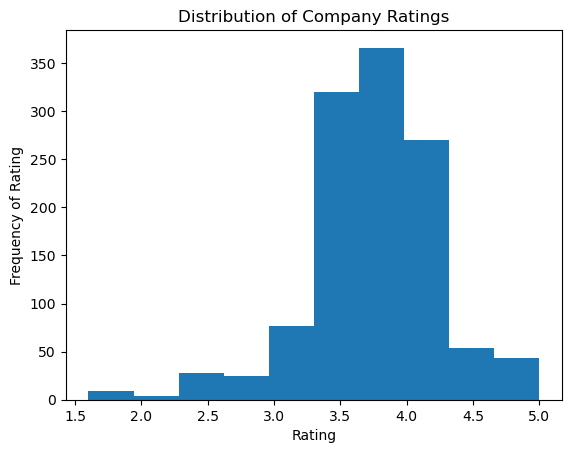

In [31]:
#plotting rating distribution
df['rating'].plot(kind='hist',title='Distribution of Company Ratings', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency of Rating')
plt.show()

In [56]:
# How many listings were present in the dataset with companies having a perfect 5 rating
best_df = df.loc[df['rating'] ==5]

print(f"Of the {df['job_description'].count()} company ratings gathered from the Google jobs listings endpoint, only {len(best_df)} listings were posted by companies that had a perfect 5 rating.")

Of the 2280 company ratings gathered from the Google jobs listings endpoint, only 19 listings were posted by companies that had a perfect 5 rating.


In [57]:
best_df

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_based_on,salary_from,salary_to,salary_source,my_keywords,job_description_summary,preprocessed_description,sentiment_score,salary_mention,named_entity_recognition
0,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
120,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
240,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
360,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
480,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
600,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
720,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
840,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/